# **CAT V/S DOG CLASSIFICATION USING TRANSFER LEARNING**

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense
import os

2024-10-02 05:06:26.858822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 05:06:26.858886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 05:06:26.860467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading the dataset

i'm using the kaggle notebook so im directly using the dataset that is availabe without downloading it

if you want to download this dataset the the link to this dataset is
https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats

In [2]:
# Cat & Dog folder path

path = '/kaggle/input/dogs-vs-cats/train/train/'

In [3]:
# getting the file names for dig and cat

file_names = os.listdir(path)

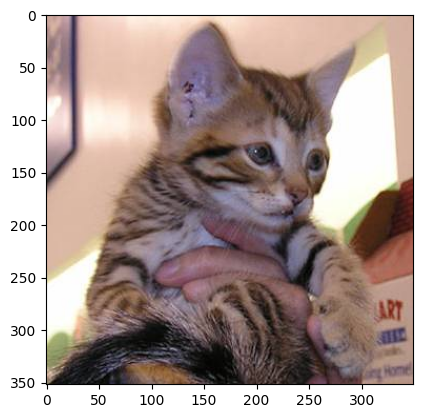

In [4]:
# displayig the images of dog and cat

img = plt.imread(path+file_names[0])
plt.imshow(img)

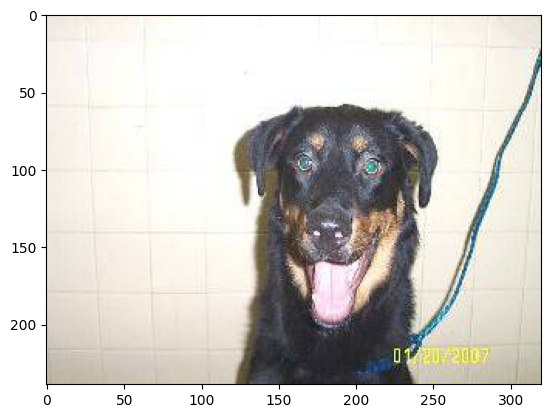

In [5]:
img = plt.imread(path+file_names[1])
plt.imshow(img)

In [6]:
# getting the shape of cat and dog images

for i in range(20):
    img = plt.imread(path+file_names[i])
    print(f'the size is = {img.shape}')

the size is = (352, 349, 3)
the size is = (239, 320, 3)
the size is = (359, 499, 3)
the size is = (333, 499, 3)
the size is = (499, 500, 3)
the size is = (367, 500, 3)
the size is = (374, 500, 3)
the size is = (333, 500, 3)
the size is = (387, 500, 3)
the size is = (332, 500, 3)
the size is = (499, 500, 3)
the size is = (374, 500, 3)
the size is = (374, 500, 3)
the size is = (413, 500, 3)
the size is = (270, 337, 3)
the size is = (423, 499, 3)
the size is = (300, 399, 3)
the size is = (302, 499, 3)
the size is = (500, 428, 3)
the size is = (374, 500, 3)


as we can see the images are of different shapes (dimensions) we have to make them in same shape

## image preprocessing

as we are using transfer learning we will only use a small amount of data to train our model \
1,000 images of cat and dog each

In [7]:
# creating a folder to store the resized images

resized_path = 'cat and dog resized images/'

os.mkdir(resized_path)

FileExistsError: [Errno 17] File exists: 'cat and dog resized images/'

In [8]:
# resizing the dog image and storing it in the resized folder

for i in range(2000):
    
    # reading the image name
    img_name = file_names[i]
    
    # reading the image
    img = cv2.imread(path+img_name)
    
    # resizing the image
    resized_img = cv2.resize(img,(224,224))
    
    # saving the resized image
    
    cv2.imwrite(resized_path+img_name , resized_img)
    

In [9]:
# getting the number of images stored
images  = os.listdir(resized_path)
len(images)

2000

In [10]:
# checking for the resized image shape
for i in range(20):
    img = plt.imread(resized_path+images[i])
    print(f'the size is = {img.shape}')

the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)
the size is = (224, 224, 3)


In [11]:
# creating labels for the images
labels = [0 if i[0] == 'd' else 1 for i in images]

# cat -> 1
# dog -> 0

the image is of cat


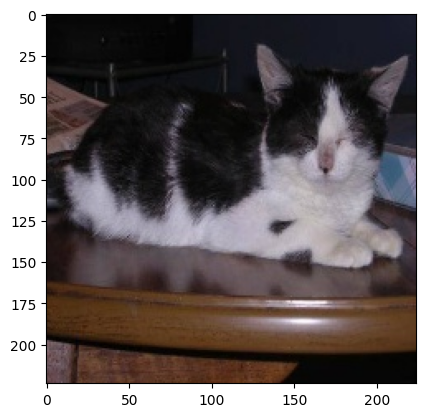

In [12]:
# showing the resized image
i =9
img = plt.imread(resized_path+images[i])
plt.imshow(img)
if(labels[i]):
    print('the image is of cat')
else:
    print('the image is of dog')

In [13]:
# getting the unique value and the counts

unique_items, item_counts = np.unique(labels, return_counts=True)

print(f'the unique values are {unique_items}')
print(f'the item counts are {item_counts}')

the unique values are [0 1]
the item counts are [1023  977]


In [14]:
# converting the images into numpy array

cat_dog_images = np.asarray([cv2.imread(resized_path+i) for i in images])
cat_dog_images

array([[[[ 33,  48,  57],
         [ 32,  47,  56],
         [ 30,  45,  54],
         ...,
         [ 25,  35,  42],
         [ 26,  36,  43],
         [ 25,  35,  42]],

        [[ 37,  52,  61],
         [ 35,  50,  59],
         [ 32,  47,  56],
         ...,
         [ 29,  39,  46],
         [ 30,  40,  47],
         [ 27,  37,  44]],

        [[ 38,  52,  64],
         [ 37,  51,  63],
         [ 35,  49,  61],
         ...,
         [ 33,  40,  49],
         [ 33,  40,  49],
         [ 29,  36,  45]],

        ...,

        [[110, 122, 128],
         [103, 115, 121],
         [103, 115, 121],
         ...,
         [ 42,  99, 150],
         [ 50, 106, 155],
         [ 48, 104, 151]],

        [[107, 118, 122],
         [107, 118, 122],
         [109, 120, 124],
         ...,
         [ 44, 101, 152],
         [ 53, 109, 158],
         [ 48, 104, 151]],

        [[112, 121, 124],
         [106, 115, 118],
         [105, 116, 120],
         ...,
         [ 49, 108, 158],
        

In [15]:
# getting the shape

cat_dog_images.shape

(2000, 224, 224, 3)

In [16]:
x = cat_dog_images
y = np.asarray(labels)

## train test split

In [17]:
# splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y)

print(f'the shape of x train = {x_train.shape}')
print(f'the shape of y train = {y_train.shape}')
print(f'the shape of x test = {x_test.shape}')
print(f'the shape of y test = {y_test.shape}')

the shape of x train = (1600, 224, 224, 3)
the shape of y train = (1600,)
the shape of x test = (400, 224, 224, 3)
the shape of y test = (400,)


In [18]:
# checking for correct distribution of 0 & 1 for the training 

unique_items, item_counts = np.unique(y_train, return_counts=True)

print(f'the unique values are {unique_items}')
print(f'the item counts are {item_counts}')

the unique values are [0 1]
the item counts are [818 782]


In [19]:
# Scaling the data

x_train = x_train/255
x_test = x_test/255

## Building the Neural Network(getting the pretrained Neural Network) [mobilenetv2]

In [20]:
# getting the pretrained model from tensorflow hub

import tensorflow_hub as hub

In [21]:
mobilenet = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet, input_shape=(224,224,3), trainable = False)

Attaching model 'google/mobilenet-v2/tensorflow2/tf2-preview-feature-vector/4' to your Kaggle notebook...


In [22]:
import tf_keras

In [23]:
model = tf_keras.Sequential()

# Adding layes to model

model.add(pretrained_model)
model.add(tf_keras.layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [24]:
# compiling the model

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [25]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
50/50 [==============================] - 48s 540ms/step - loss: 0.2082 - acc: 0.9137
Epoch 2/8
50/50 [==============================] - 27s 540ms/step - loss: 0.0678 - acc: 0.9756
Epoch 3/8
50/50 [==============================] - 27s 542ms/step - loss: 0.0514 - acc: 0.9831
Epoch 4/8
50/50 [==============================] - 27s 542ms/step - loss: 0.0404 - acc: 0.9831
Epoch 5/8
50/50 [==============================] - 27s 543ms/step - loss: 0.0321 - acc: 0.9887
Epoch 6/8
50/50 [==============================] - 26s 527ms/step - loss: 0.0269 - acc: 0.9912
Epoch 7/8
50/50 [==============================] - 26s 524ms/step - loss: 0.0221 - acc: 0.9975
Epoch 8/8
50/50 [==============================] - 27s 532ms/step - loss: 0.0198 - acc: 0.9975


In [26]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 8s 505ms/step - loss: 0.0291 - acc: 0.9875


[0.029050402343273163, 0.987500011920929]

the accuracy is 98.75%

In [27]:
# predicting from the model

y_pred = model.predict(x_test)

13/13 [==============================] - 7s 493ms/step


In [28]:
y_pred[0]

array([0.04492513, 0.97647464], dtype=float32)

In [29]:
# getting the labels

y_pred_labels = [np.argmax(i) for i in y_pred]

In [30]:
y_pred_labels[0]

1

In [31]:
con_mat = tf.math.confusion_matrix(y_test, y_pred_labels)

In [32]:
con_mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[202,   3],
       [  2, 193]], dtype=int32)>

Text(50.722222222222214, 0.5, 'actual label')

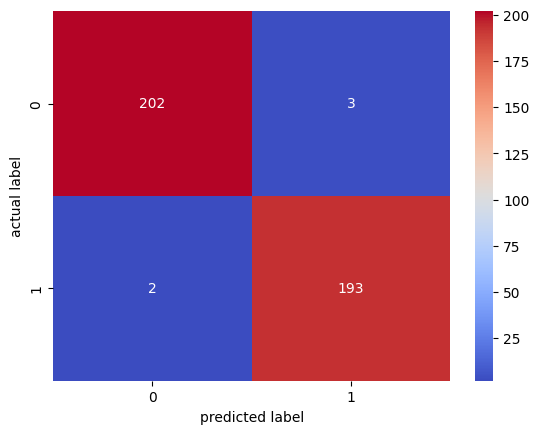

In [33]:
# plotting a heatmap

sns.heatmap(con_mat, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('predicted label')
plt.ylabel('actual label')

## building the predictive system

enter the image path /kaggle/input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/Dog/0.jpg


(1, 224, 224, 3)
1/1 [==============================] - 0s 51ms/step
the image is of dog


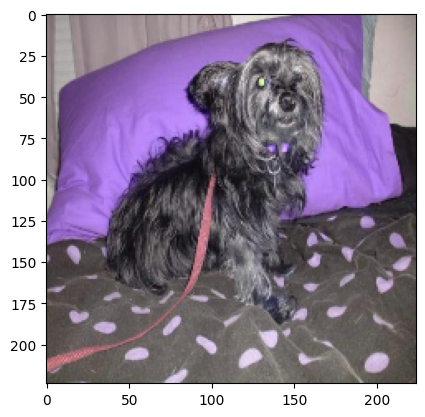

In [42]:

# taking the image path from the user
img_path = input('enter the image path')

# reading the image and resizing it
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# showing the image
plt.imshow(img)

# the model expects the input to be a dataset insteaad of single image so to 
# convert it into 4 dim we use the below code
img = tf.expand_dims(img,0)

# normalizing the image
img = img/255
print(img.shape)


# predicting the image
pred = model.predict(img)

label = np.argmax(pred)

if(label):
    print('the image is of cat')
else:
    print('the image is of dog')